In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

hitting = pd.read_csv('team_hitting_statistics.csv')
pitching = pd.read_csv('team_pitching_statistics.csv')
combined = hitting.merge(pitching, on='Team')

# combined.columns

# Split Training and  Test Data
Note: Only one 'Postseason' key is needed, and win/lose should not be a factor in calculating (obviously :D)

In [27]:
X = combined
y = combined['Postseason_y']
X.drop(['Team', 'Postseason_y', 'Postseason_x', 'W', 'L', 'W-L%'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Random Forest Classifier and Logistic Regression
Use classifier and regression model for this data an

C:\Users\Stanley Wu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8777777777777778


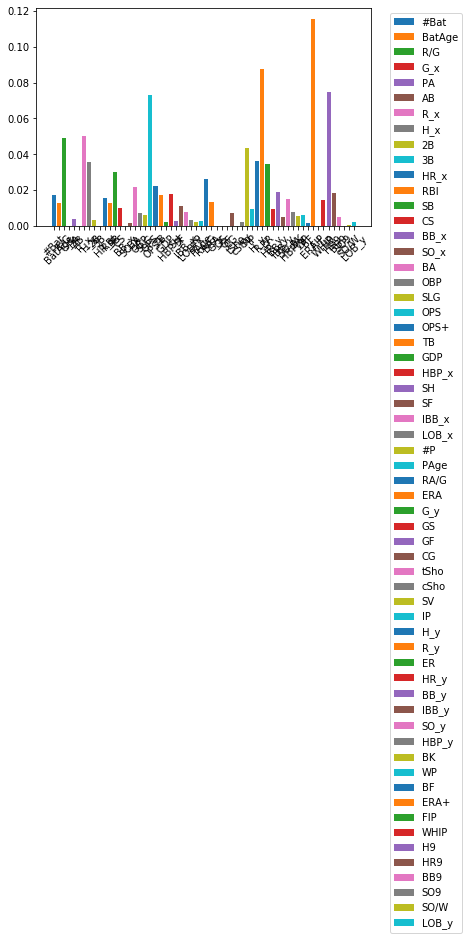

0.8777777777777778


C:\Users\Stanley Wu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
feature_data = pd.DataFrame({"feature_name": X.columns, "feature_importance": rfc.feature_importances_}) 
rf_accuracy_score = accuracy_score(y_test, rfc_pred)
print(rf_accuracy_score)
    
for index, row in feature_data.iterrows():
    plt.bar(row['feature_name'], row['feature_importance'], label=row['feature_name'])
        
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

predictions = logmodel.predict(X_test)
# print(classification_report(y_test, predictions))
    
log_accuracy_score = accuracy_score(y_test, predictions)
print(log_accuracy_score)